In [30]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block

In [34]:
evaluate_last_X_years = False
X=10
currency_pair = 'NOK=X'
numbers_in_currency = 'USD'
share_name = 'YAR.OL'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount
## Pull historical USD national currency rates to dividend & calculate historical dividend in USD

In [32]:
# ticker_share = yf.Ticker(share_name)
# dividend = ticker_share.history(period='max', interval="1wk")
# dividend = dividend[dividend['Dividends'] > 0]
# dividend = dividend.rename(columns={'Dividends': 'local_amount'})

# dividend['real_date'] = dividend.index 
# dividend['real_date'] = dividend['real_date'].dt.tz_localize(None)

# dividend = dividend[['real_date', 'local_amount']]

# dividend['usd_rate'] = utils.daily_price(ticker=currency_pair, end=dividend['real_date'], days_earlier=3)
# dividend['currency'] = [currency_pair.split(sep='=')[0] for x in range(len(dividend))]
# dividend['usd_dividend'] = dividend['local_amount'] / dividend['usd_rate']

# dividend.head()

## Extend your input statement table with historical dividend data and calculate share prices!

# 1.2. Raw input statement data

In [33]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [35]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2009-03-31,2496,-1992,504,-165,0,-173,11,177,-46,...,7,-342,-1,0,0,-103,-104,-26,147,289
1,2009-06-30,2488,-2146,341,-186,0,-175,241,221,-46,...,42,-139,-1,-185,0,-695,-881,44,-319,289
2,2009-09-30,2352,-2012,340,-183,0,-184,96,68,-10,...,5,-195,0,-16,-37,-338,-391,-1,-161,289
3,2009-12-31,2425,-1969,456,-202,0,-217,36,73,-177,...,45,-194,0,-6,-1,-9,-17,-6,-21,289
4,2010-03-31,2669,-1925,743,-187,0,-174,-62,320,-59,...,22,-172,0,0,0,-227,-227,-2,11,288


## Calculate date when quaterly reports could be available

In [37]:
data = utils.calculate_real_date(data)

## Pull historical average USD national currency rates and add to the dataframe

In [38]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares,real_date,usd_nat_currency
0,2009-03-31,2496,-1992,504,-165,0,-173,11,177,-46,...,-1,0,0,-103,-104,-26,147,289,2009-04-21,6.866184
1,2009-06-30,2488,-2146,341,-186,0,-175,241,221,-46,...,-1,-185,0,-695,-881,44,-319,289,2009-07-21,6.489962
2,2009-09-30,2352,-2012,340,-183,0,-184,96,68,-10,...,0,-16,-37,-338,-391,-1,-161,289,2009-10-21,6.113842
3,2009-12-31,2425,-1969,456,-202,0,-217,36,73,-177,...,0,-6,-1,-9,-17,-6,-21,289,2010-02-11,5.677891
4,2010-03-31,2669,-1925,743,-187,0,-174,-62,320,-59,...,0,0,0,-227,-227,-2,11,288,2010-04-21,5.852840


## Convert USD values related to IS, BS, CFS to national currency

In [39]:
# convert columns into national currency
data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
data_nat_curr.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares,real_date,usd_nat_currency
0,2009-03-31,17137.996222,-13677.439292,3460.556929,-1132.920423,0.0,-1187.849898,75.528028,1215.314636,-315.844482,...,-6.866184,0.000000,0.000000,-707.216992,-714.083176,-178.520794,1009.329104,289,2009-04-21,6.866184
1,2009-06-30,16147.026653,-13927.459484,2213.077206,-1207.133021,0.0,-1135.743434,1564.080958,1434.281708,-298.538274,...,-6.489962,-1200.643059,0.000000,-4510.523924,-5717.656946,285.558349,-2070.298031,289,2009-07-21,6.489962
2,2009-09-30,14379.756759,-12301.050425,2078.706334,-1118.833115,0.0,-1124.946957,586.928847,415.741267,-61.138422,...,0.000000,-97.821475,-226.212160,-2066.478650,-2390.512284,-6.113842,-984.328588,289,2009-10-21,6.113842
3,2009-12-31,13768.884792,-11179.766662,2589.118130,-1146.933908,0.0,-1232.102268,204.404063,414.486016,-1004.986643,...,0.000000,-34.067344,-5.677891,-51.101016,-96.524141,-34.067344,-119.235703,289,2010-02-11,5.677891
4,2010-03-31,15621.229937,-11266.716984,4348.660114,-1094.481078,0.0,-1018.394159,-362.876079,1872.908797,-345.317559,...,0.000000,0.000000,0.000000,-1328.594678,-1328.594678,-11.705680,64.381240,288,2010-04-21,5.852840


# 2. Filter out unnecesary columns

In [40]:
filtered_nat_curr = utils.filter_raw_data(data_nat_curr)

# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [41]:
filtered_nat_curr = utils.calculate_input_value_ratios(filtered_nat_curr)

## Calculate input values to value ratios

In [42]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [46]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data
## Pull historical share prices

In [47]:
obj = yf.Ticker('YAR.OL')
ticker_share_price = obj.history(interval="1wk", start=data.date.min(), end=pd.Timestamp.now())
# add new date column due to pd.merge_asof match
ticker_share_price['real_date'] = ticker_share_price.index
# remove localization (timezone) to let merge the two columns
ticker_share_price['real_date'] = ticker_share_price['real_date'].dt.tz_localize(None)
# add share price column and keep the date and share prices
ticker_share_price['share_price'] = ticker_share_price['Close']
ticker_share_price = ticker_share_price[['real_date', 'share_price']]

ticker_share_price.tail()

,real_date,share_price
Date,,
2024-01-15 00:00:00+01:00,2024-01-15,340.000000
2024-01-22 00:00:00+01:00,2024-01-22,353.000000
2024-01-29 00:00:00+01:00,2024-01-29,352.600006
2024-02-05 00:00:00+01:00,2024-02-05,357.200012
2024-02-12 00:00:00+01:00,2024-02-12,355.000000


## Merge the statement dataset with share prices

In [48]:
merged_nat_curr = pd.merge_asof(left=ticker_share_price, right=ratios_nat_curr, on='real_date', direction='backward')
# drop rows with np.Nan and reset index
merged_nat_curr = merged_nat_curr.dropna()
merged_nat_curr = merged_nat_curr.reset_index(drop=True)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2009-04-27,83.499878,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,0.386077,0.613923,7.193084,inf,16.0,3.643347,0.201923,0.052885,0.047987,0.124294
1,2009-05-04,90.497078,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,0.386077,0.613923,7.193084,inf,16.0,3.643347,0.201923,0.052885,0.047987,0.124294
2,2009-05-11,98.783958,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,0.386077,0.613923,7.193084,inf,16.0,3.643347,0.201923,0.052885,0.047987,0.124294
3,2009-05-18,102.959602,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,0.386077,0.613923,7.193084,inf,16.0,3.643347,0.201923,0.052885,0.047987,0.124294
4,2009-05-25,98.545341,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,0.386077,0.613923,7.193084,inf,16.0,3.643347,0.201923,0.052885,0.047987,0.124294


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [49]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
0,2009-04-27,83.499878,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,16.0,3.643347,0.201923,0.052885,0.047987,0.124294,6.656322,0.827339,0.352017,0.907680
1,2009-05-04,90.497078,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,16.0,3.643347,0.201923,0.052885,0.047987,0.124294,7.214114,0.896670,0.381516,0.983743
2,2009-05-11,98.783958,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,16.0,3.643347,0.201923,0.052885,0.047987,0.124294,7.874716,0.978778,0.416451,1.073825
3,2009-05-18,102.959602,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,16.0,3.643347,0.201923,0.052885,0.047987,0.124294,8.207584,1.020152,0.434055,1.119216
4,2009-05-25,98.545341,2009-03-31,17137.996222,12.544448,100.925783,289.0,26585.865933,91.992616,1.927333,...,16.0,3.643347,0.201923,0.052885,0.047987,0.124294,7.855694,0.976414,0.415445,1.071231


# Calculate Dividend yield and currency-share price correlation

In [51]:
obj = yf.Ticker('NOK=X')
obj2 = yf.Ticker('YAR.OL')
usd_nat_curr = obj.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
usd_nat_curr['date'] = usd_nat_curr.index
usd_nat_curr['date'] = usd_nat_curr['date'].dt.tz_localize(None)
usd_nat_curr['currency_rate'] = usd_nat_curr['Close']

In [52]:
ticker_all_price = obj2.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
ticker_all_price['date'] = ticker_all_price.index
ticker_all_price['date'] = ticker_all_price['date'].dt.tz_localize(None)
ticker_all_price['share_price'] = ticker_all_price['Close']
ticker_all_price['dividend_yield'] = ticker_all_price['Dividends'] * 100 / ticker_all_price['Close']

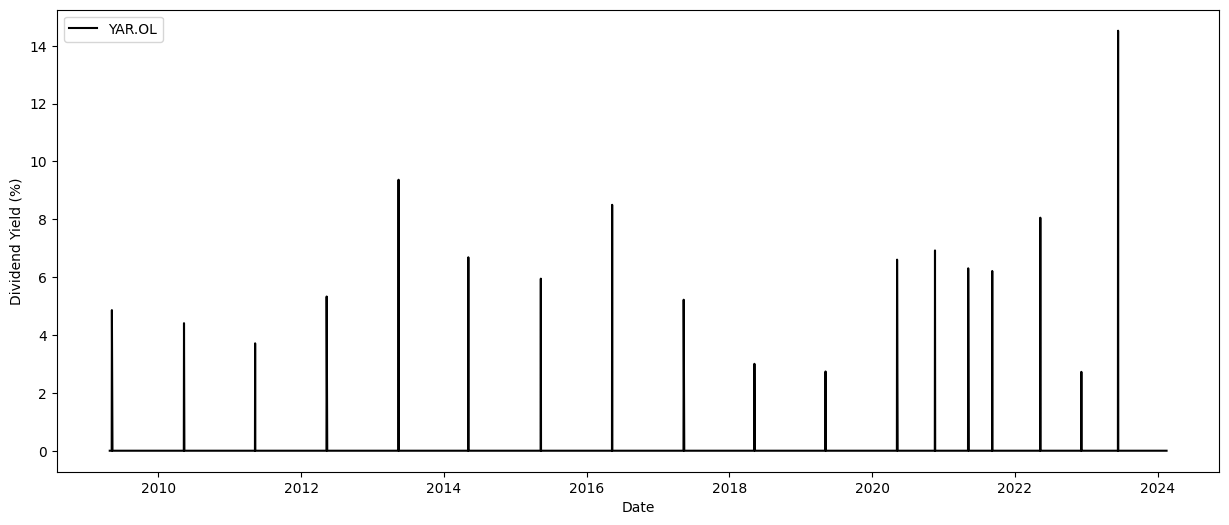

In [53]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(ticker_all_price.index, ticker_all_price['dividend_yield'], color='k', label='YAR.OL')

ax1.set_xlabel('Date')
ax1.set_ylabel('Dividend Yield (%)', color='k')

plt.legend()
plt.show()

In [60]:
share_price_currency_rate_correlation = pd.merge_asof(left=usd_nat_curr, right=ticker_all_price, on='date')
share_price_currency_rate_correlation.index = share_price_currency_rate_correlation['date']
share_price_currency_rate_correlation = share_price_currency_rate_correlation[['currency_rate', 'share_price']]

share_price_currency_rate_correlation.corr()['share_price']

currency_rate    0.856859
share_price      1.000000
Name: share_price, dtype: float64

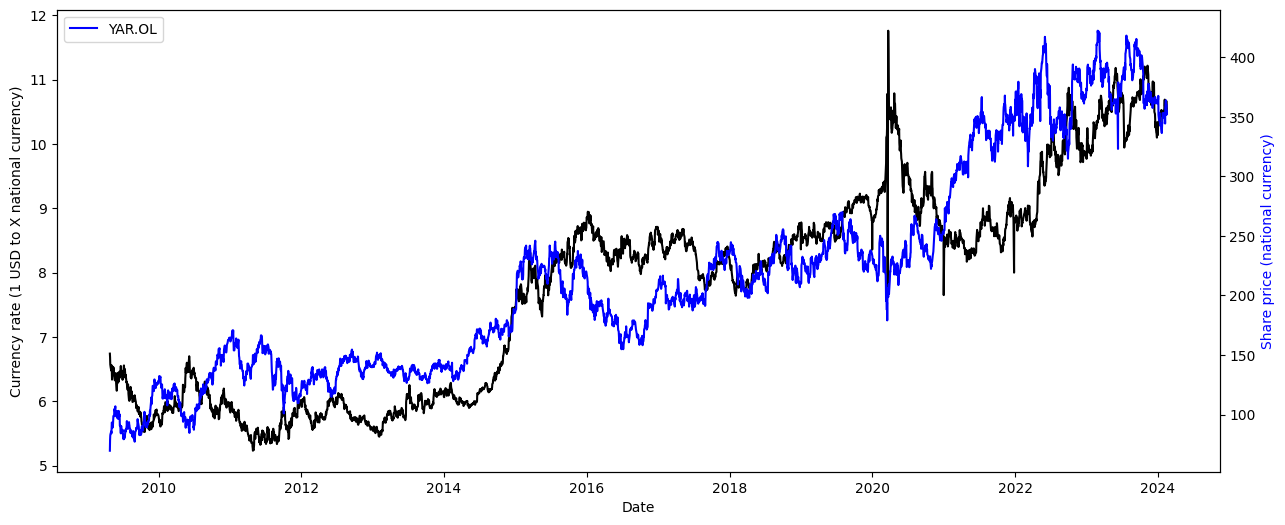

In [61]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax2 = ax1.twinx()
ax1.plot(usd_nat_curr.index, usd_nat_curr['Close'], color='k', label='USD / national currency')
ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

ax1.set_xlabel('Date')
ax1.set_ylabel('Currency rate (1 USD to X national currency)', color='k')
ax2.set_ylabel('Share price (national currency)', color='b')

plt.legend()
plt.show()

# Share price and value ratios

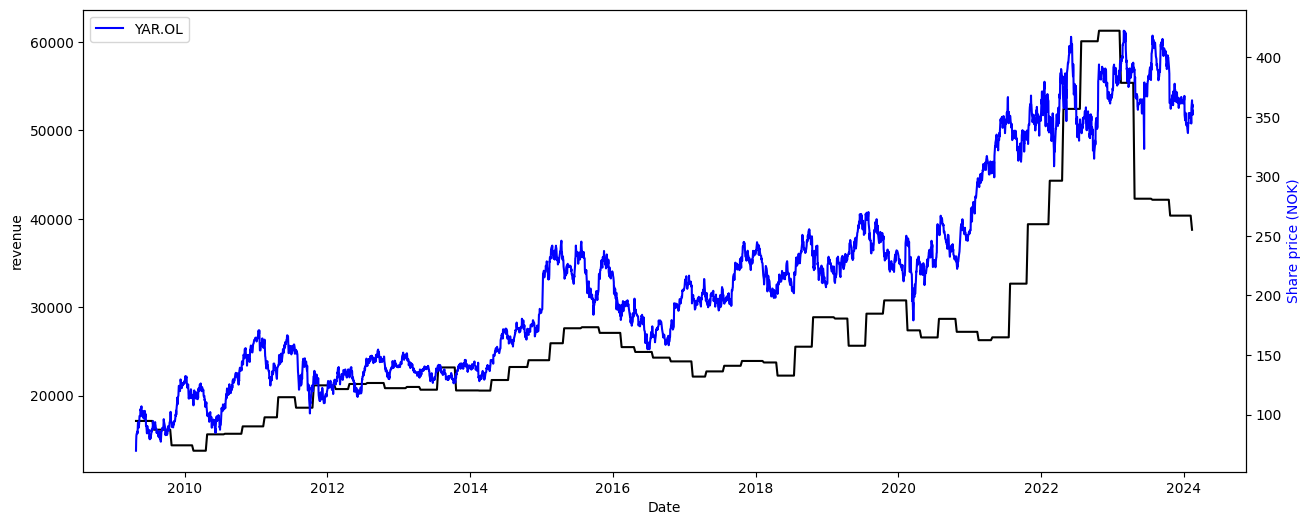

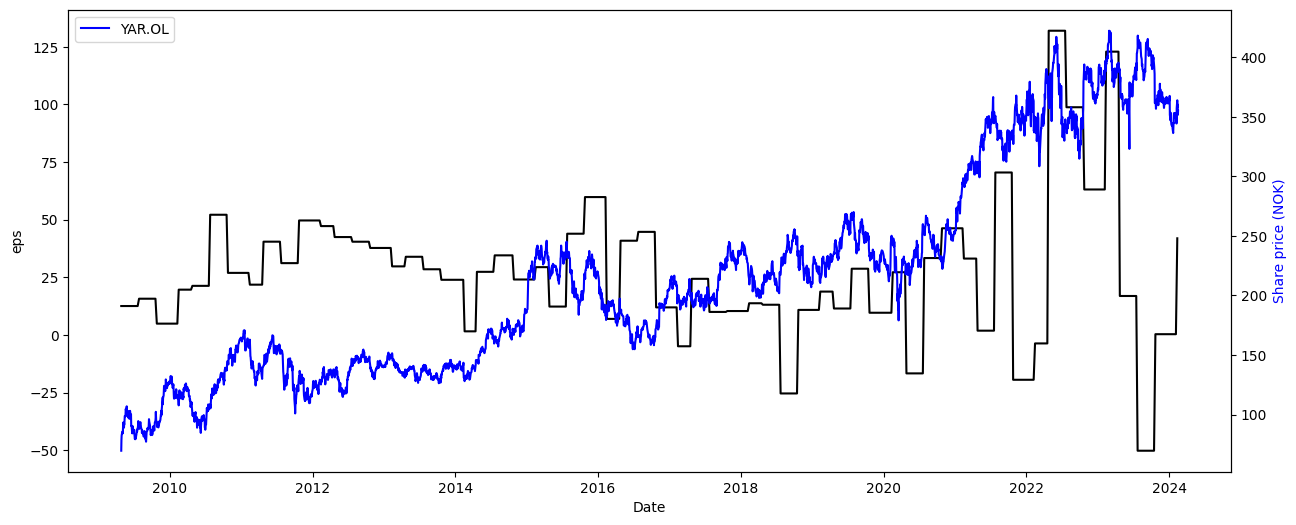

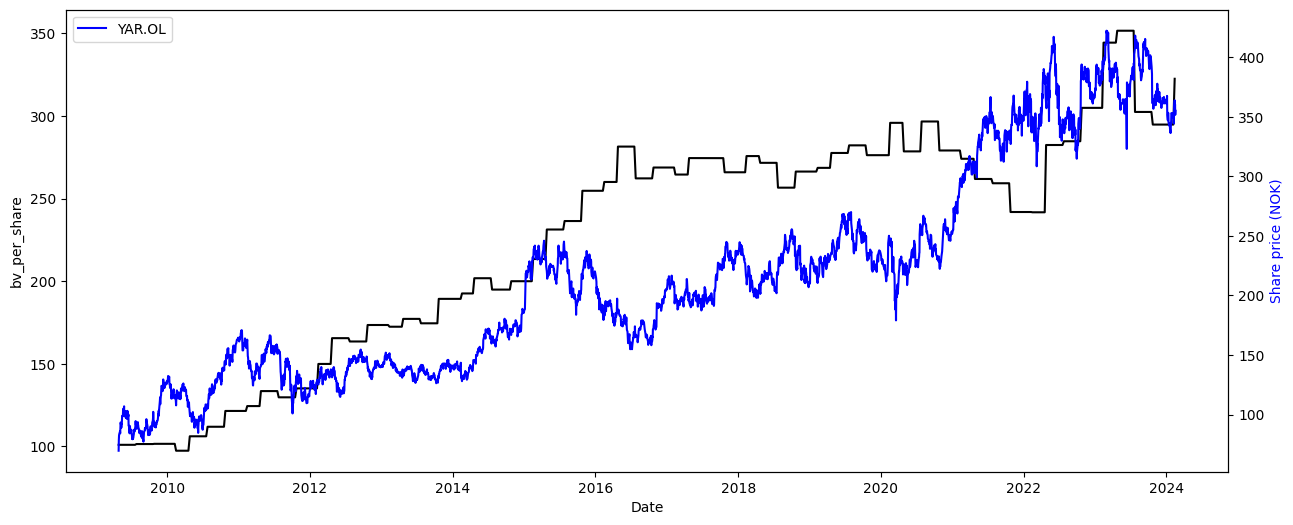

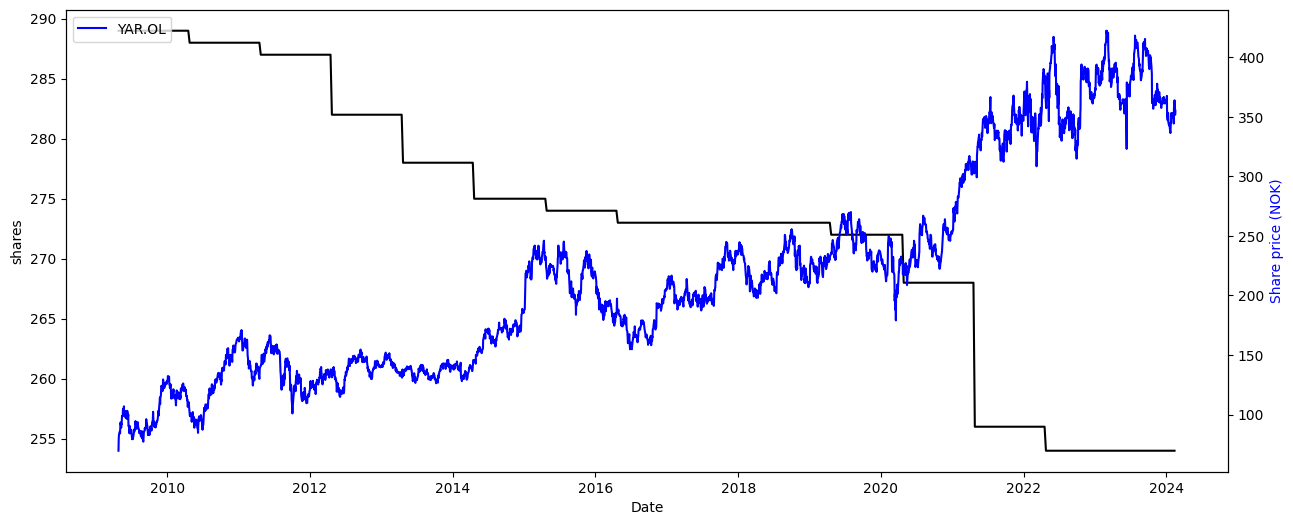

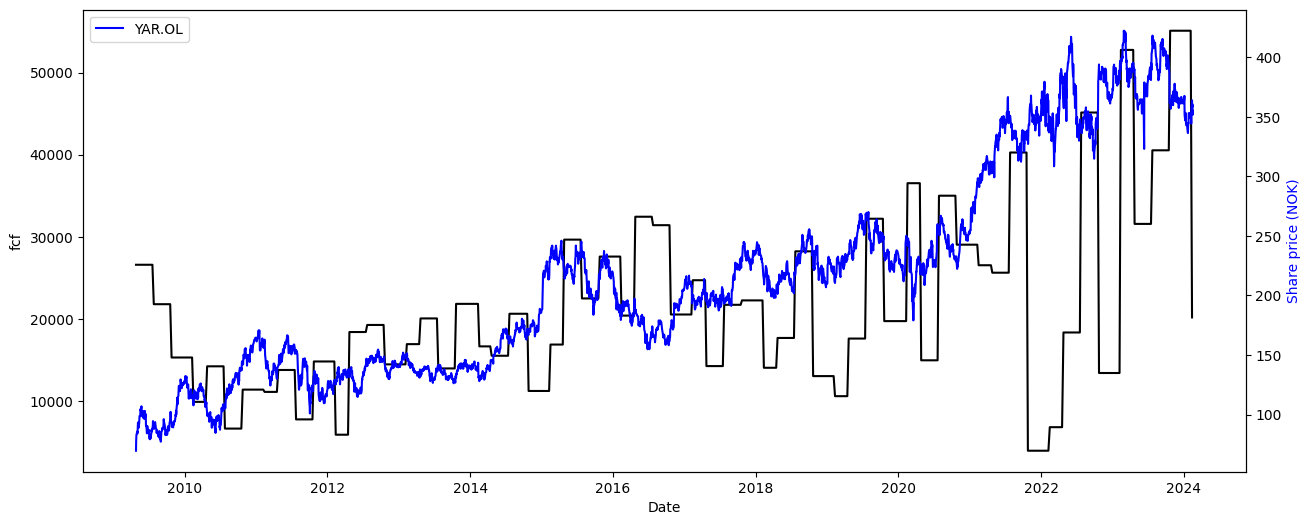

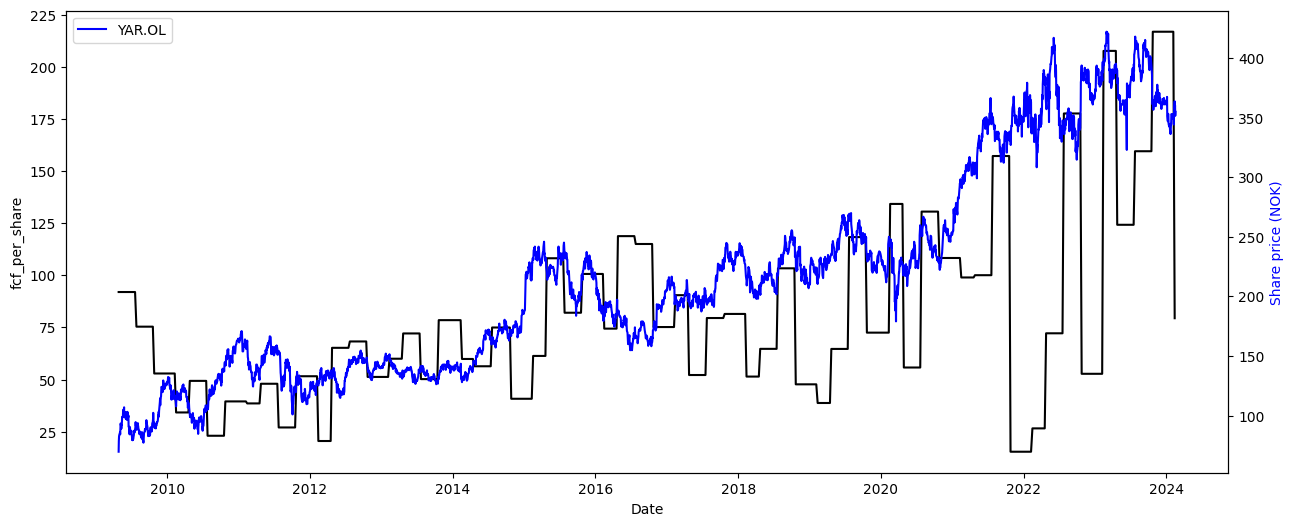

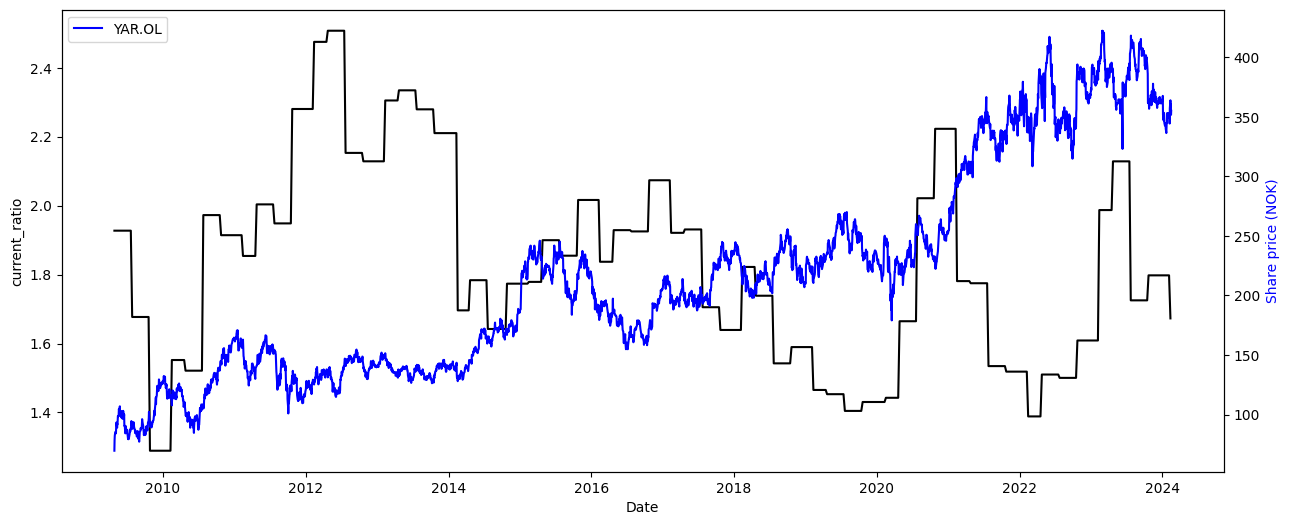

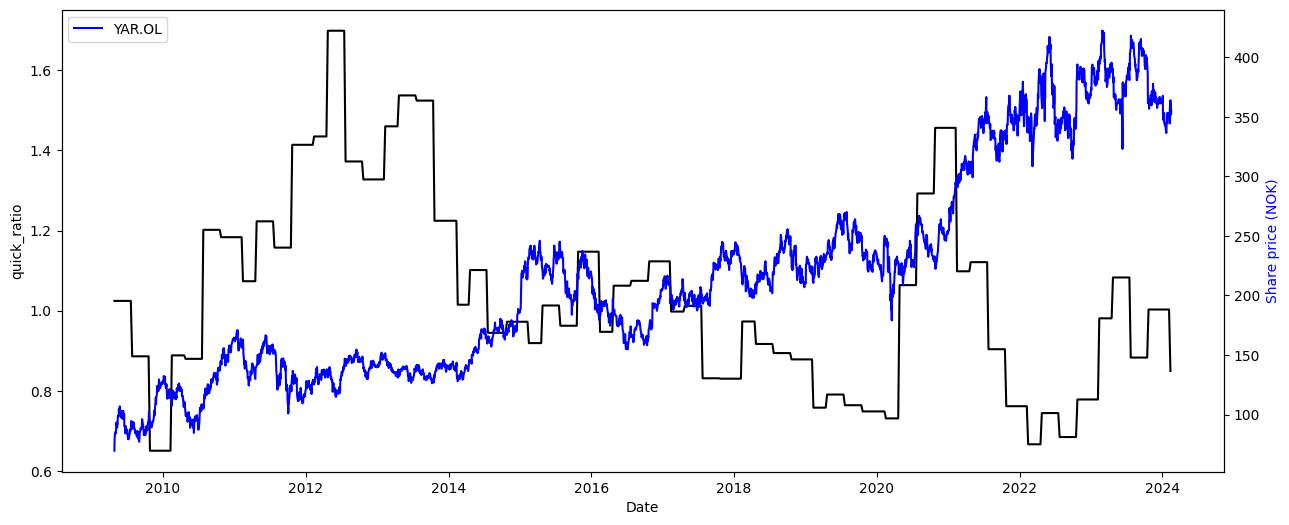

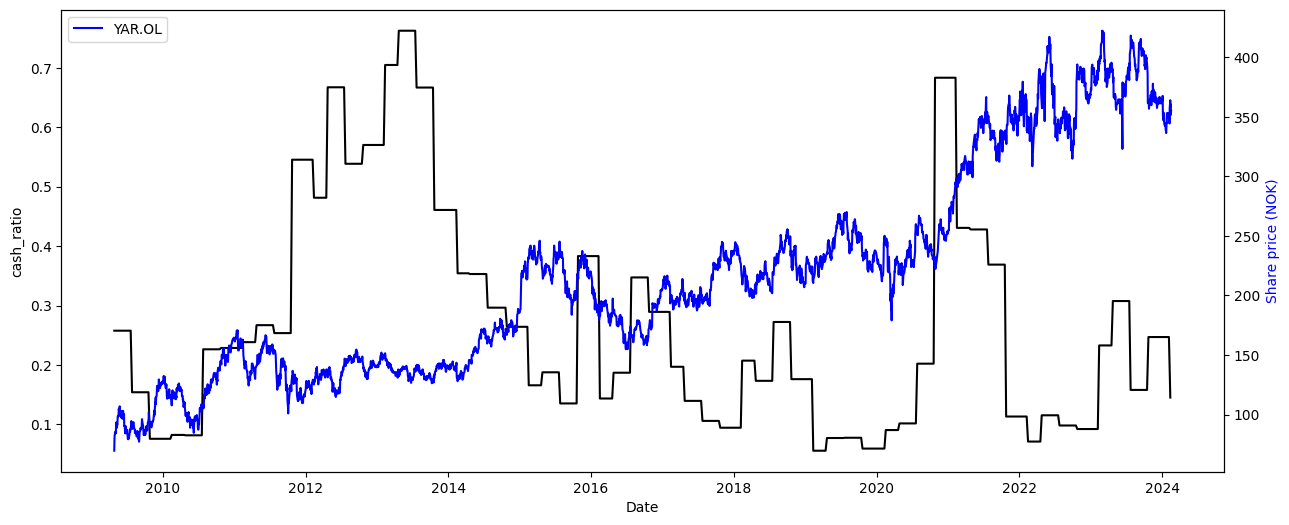

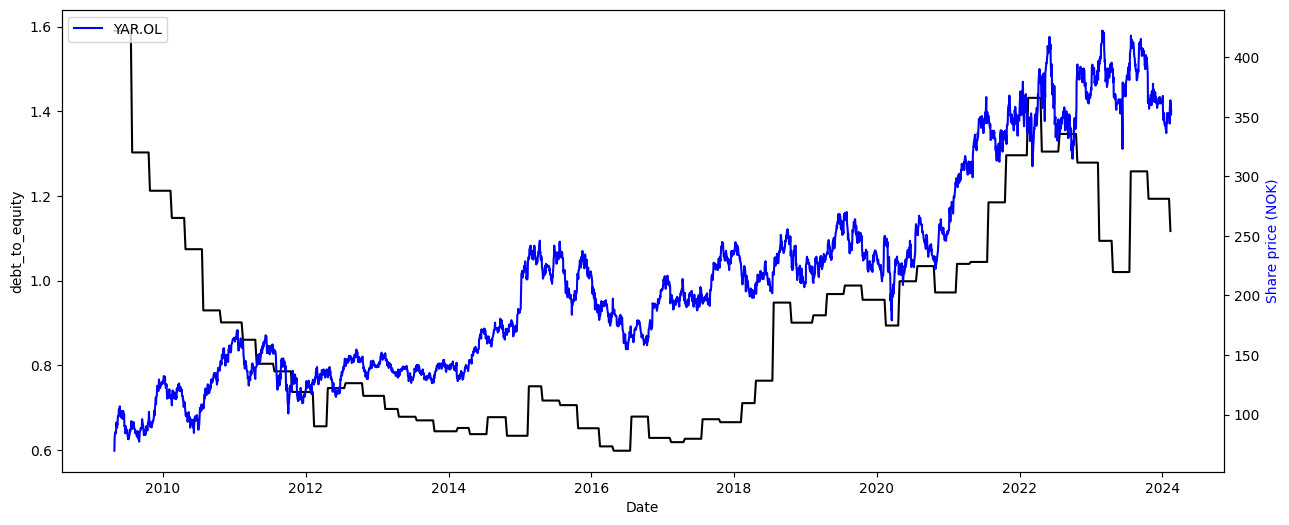

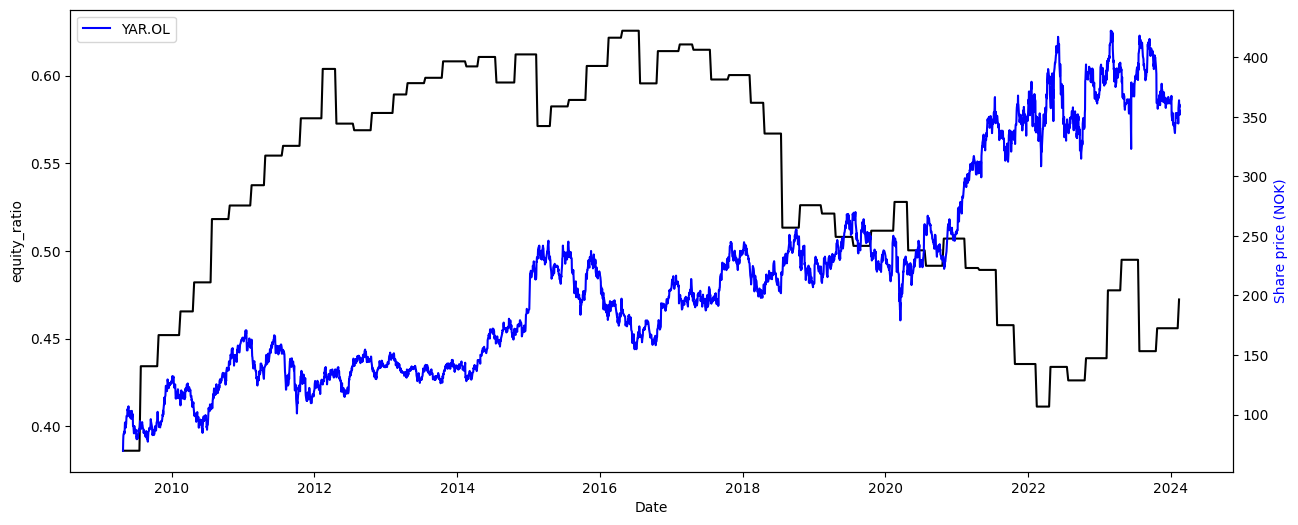

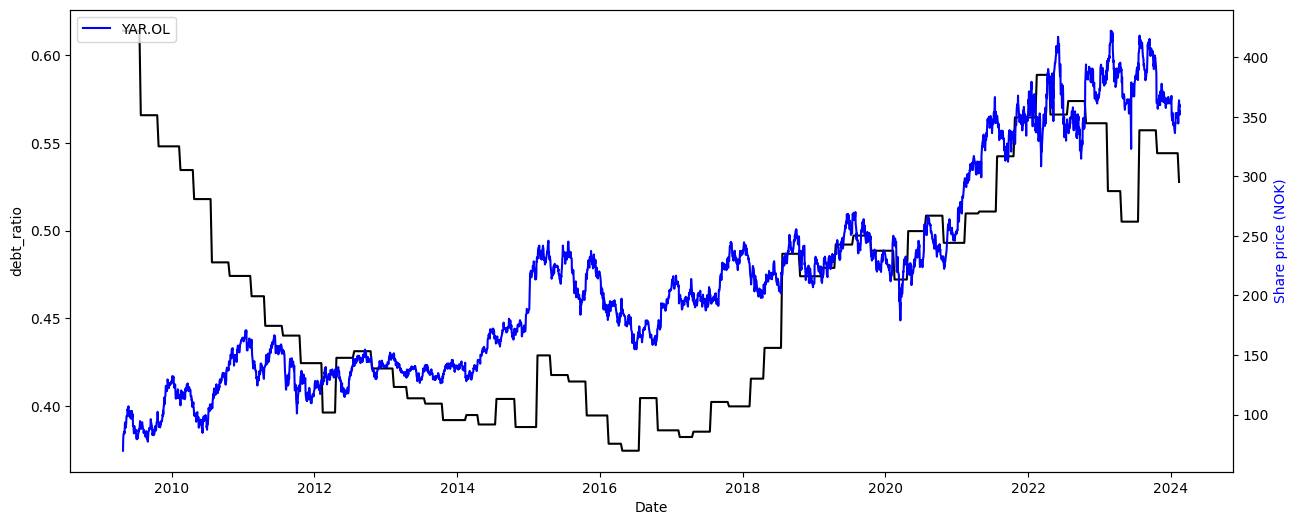

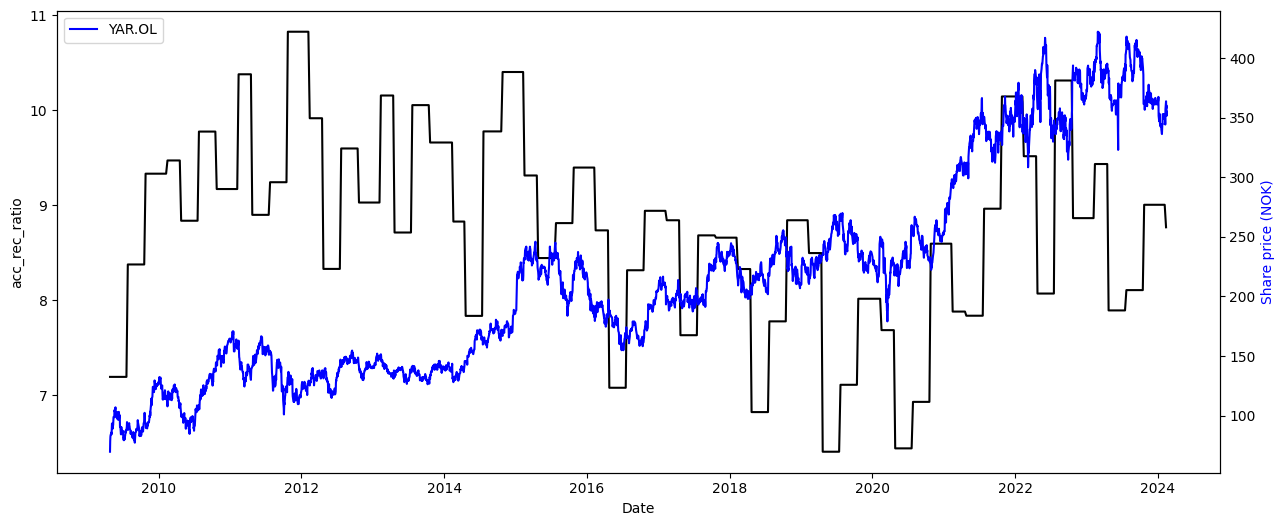

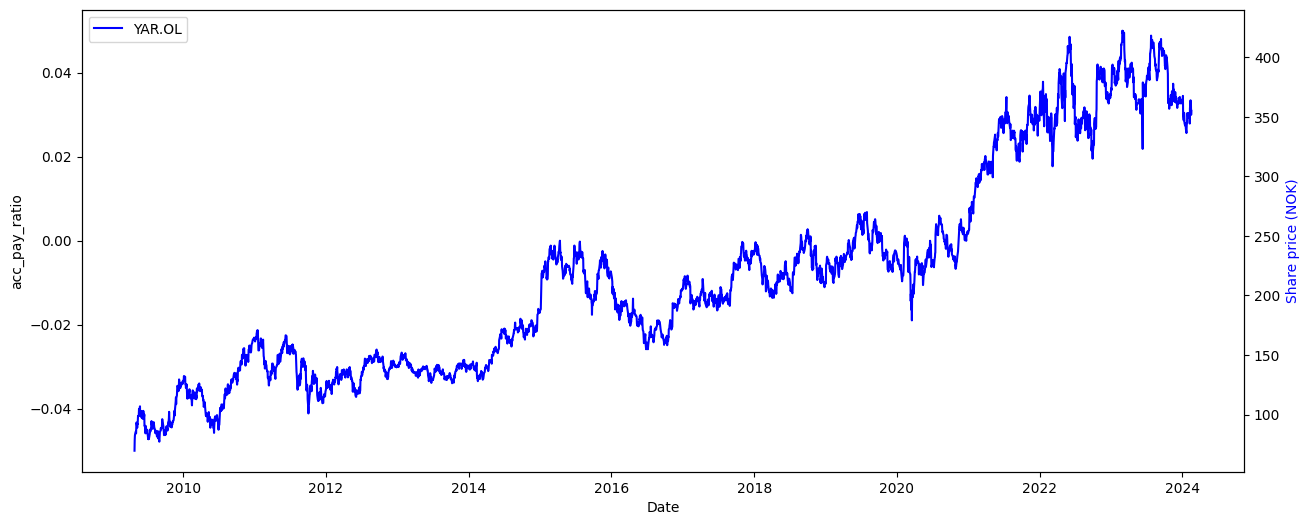

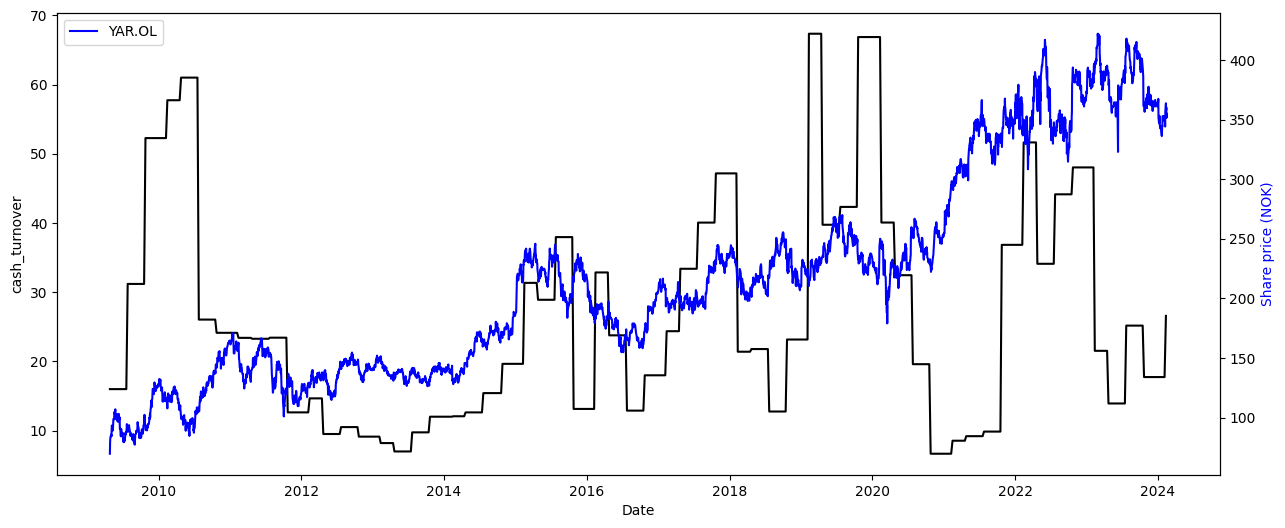

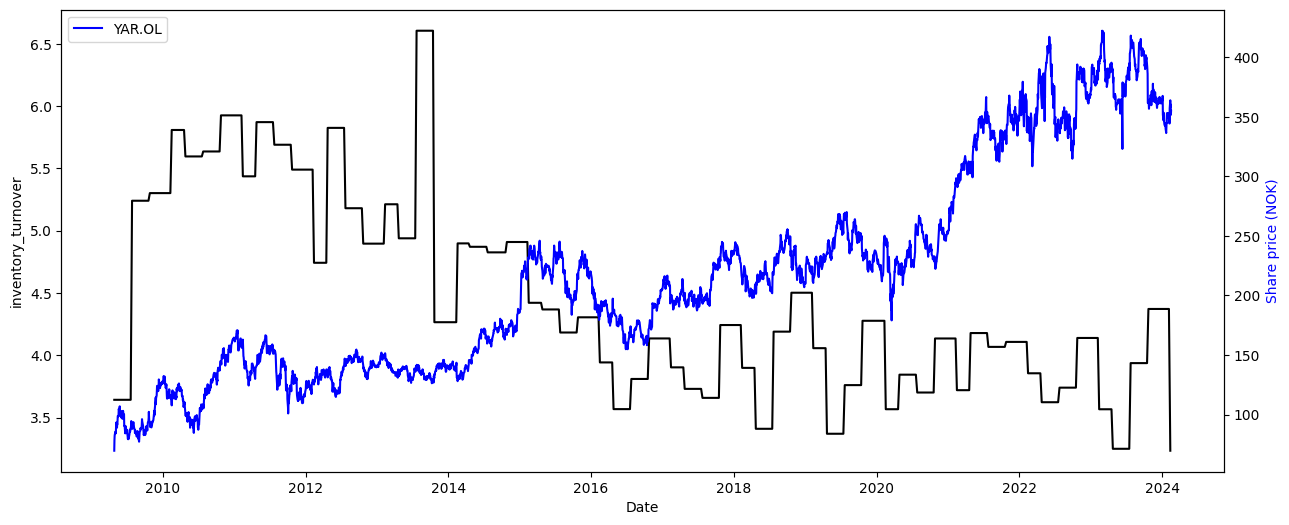

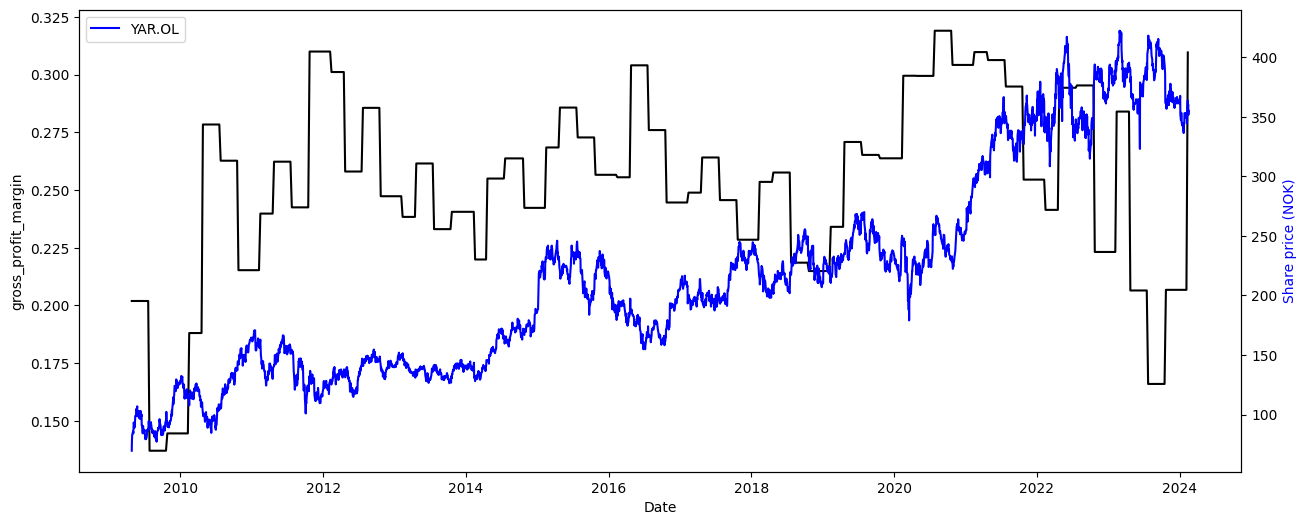

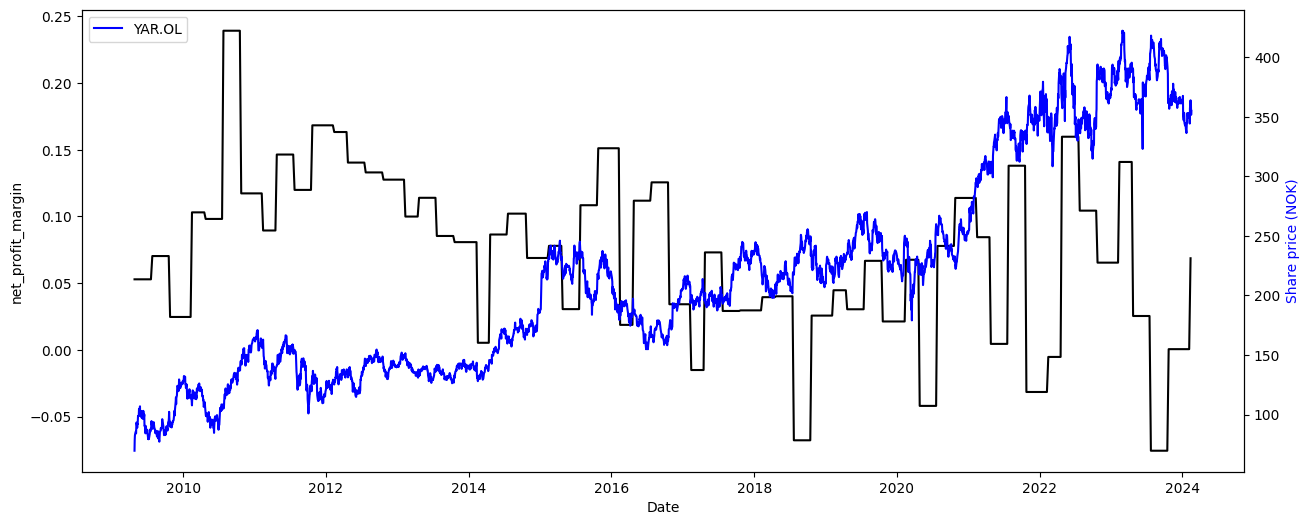

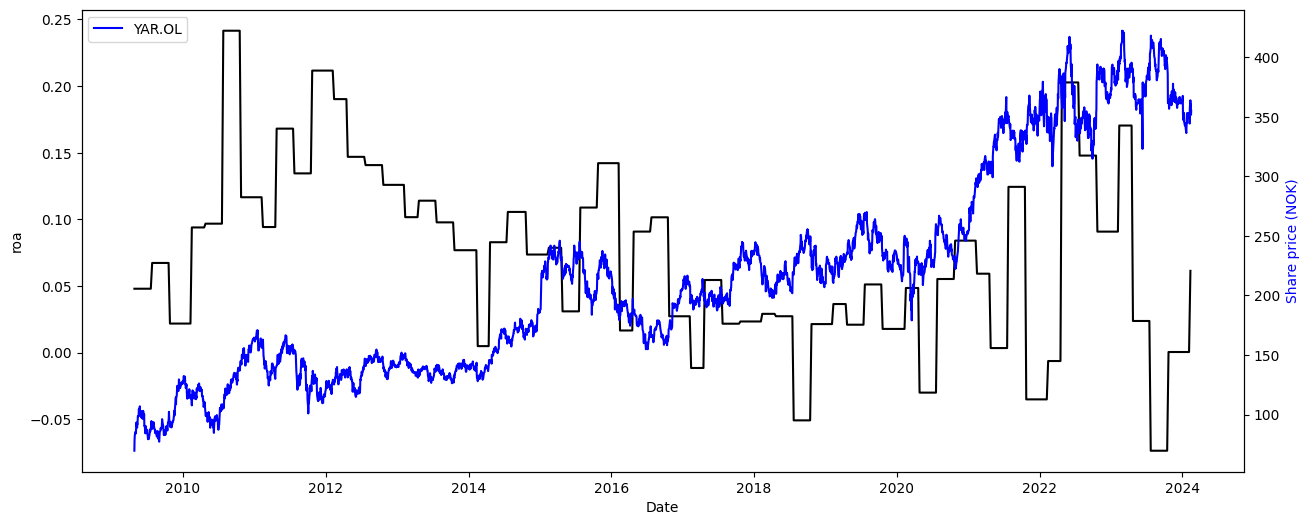

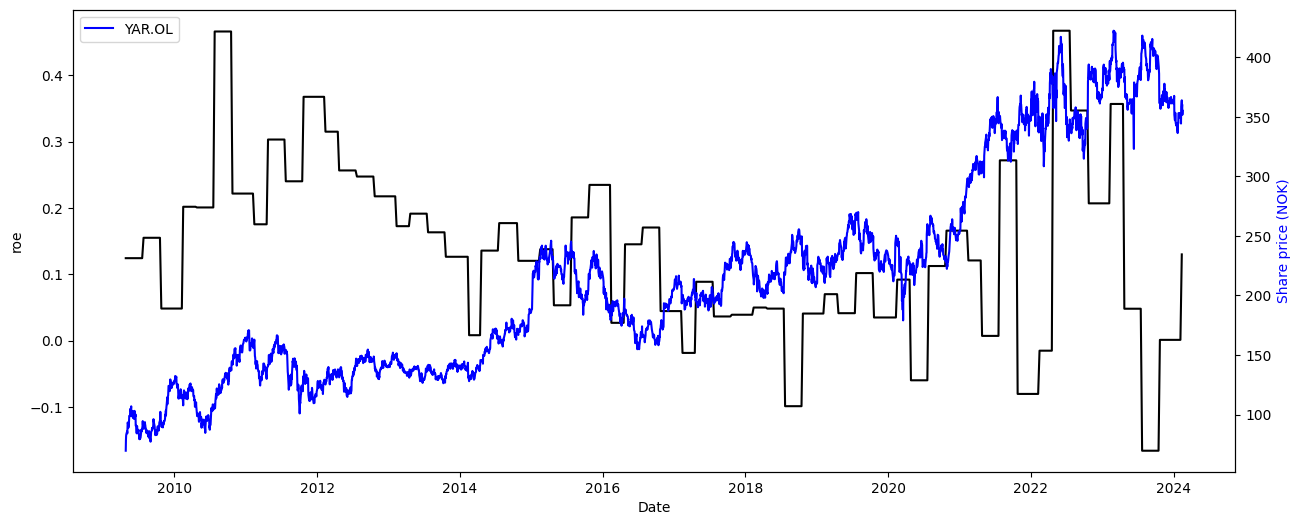

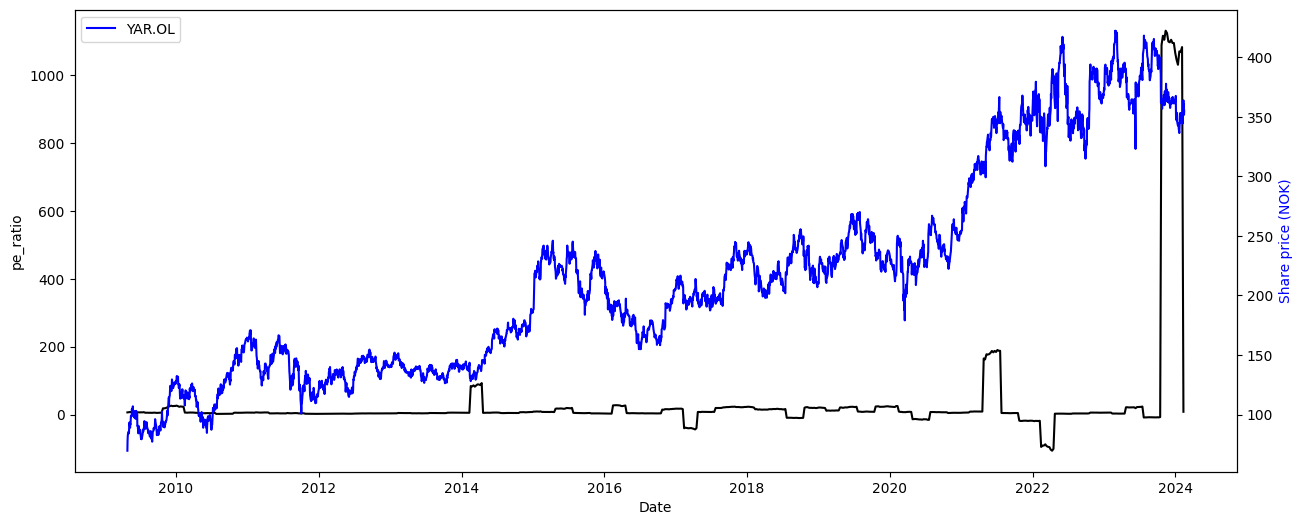

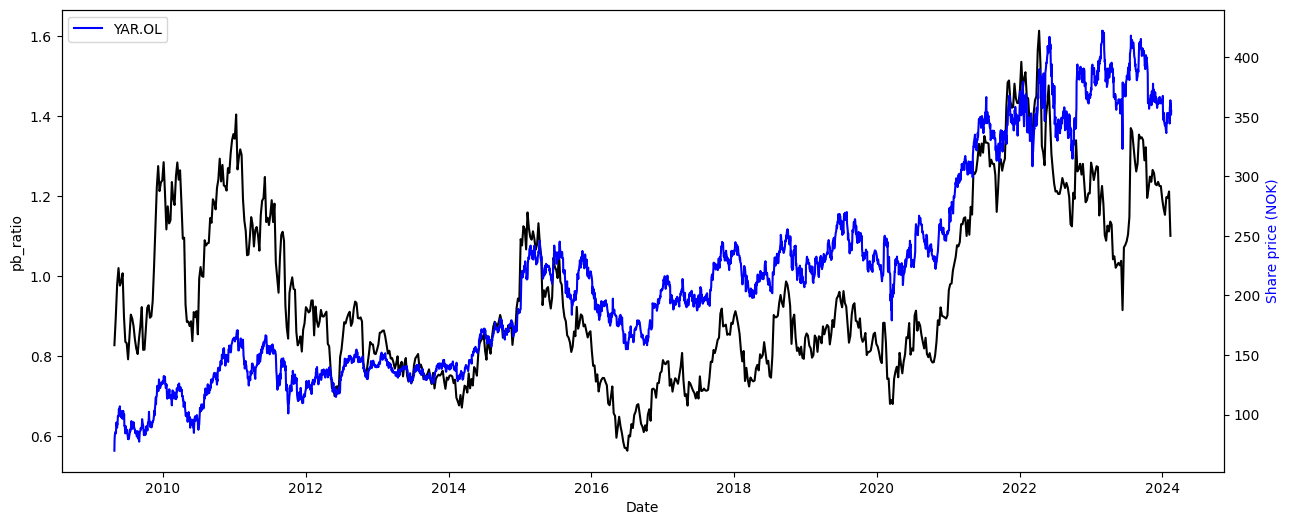

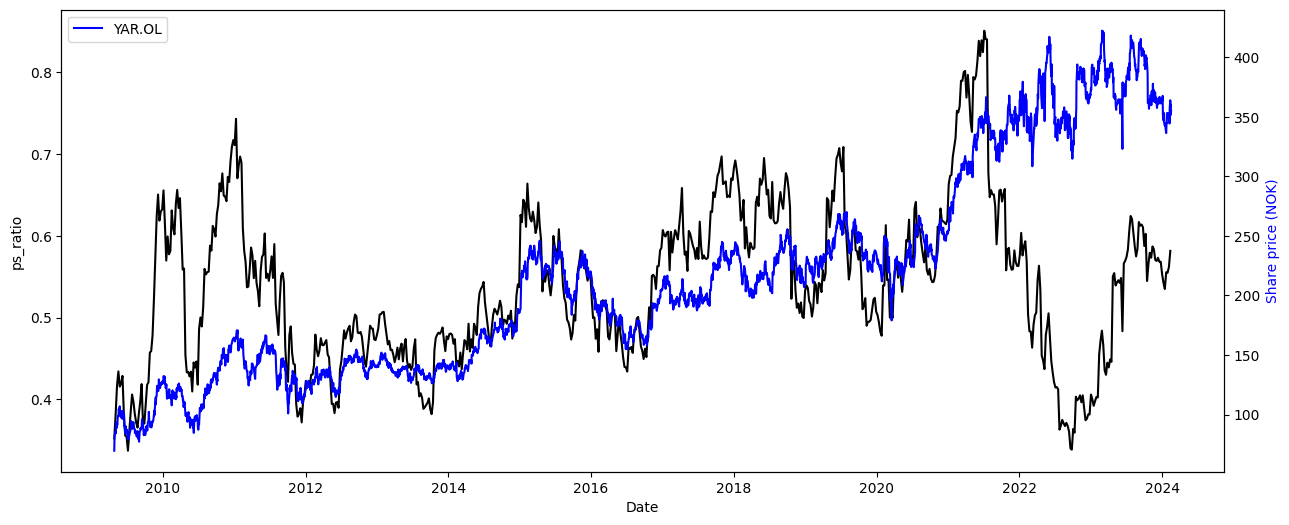

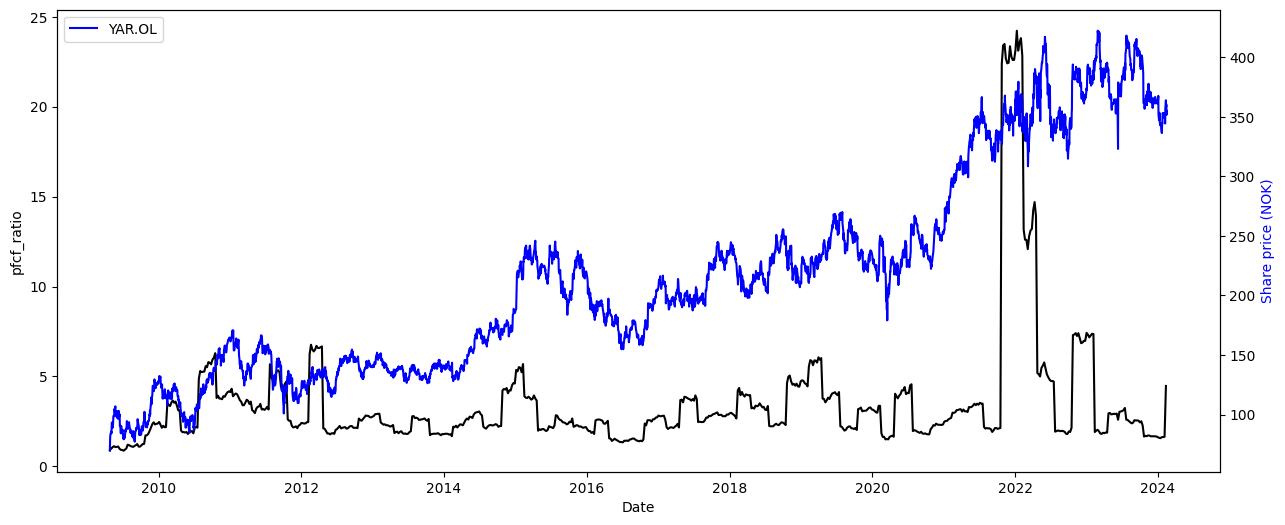

In [62]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=column)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (NOK)', color='b')

    plt.legend()
    plt.show()

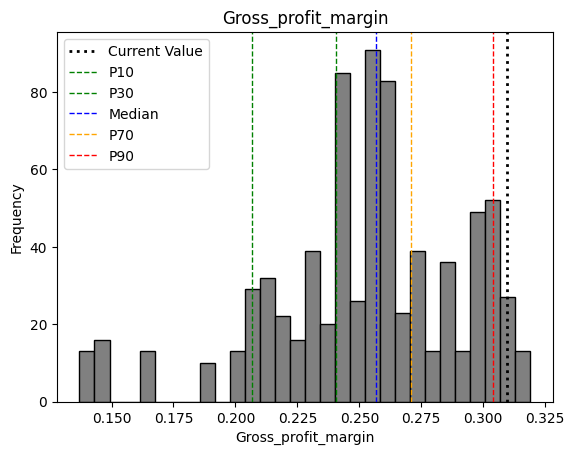

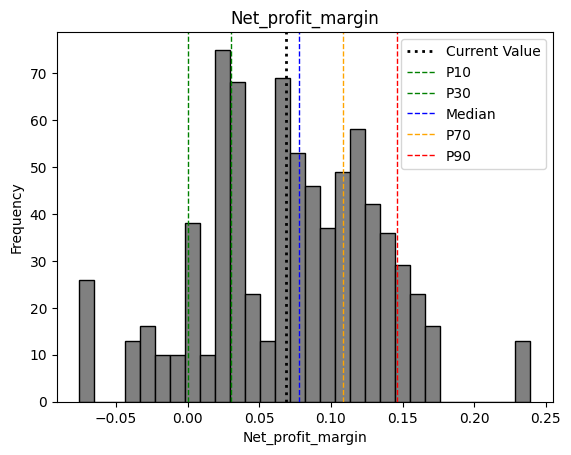

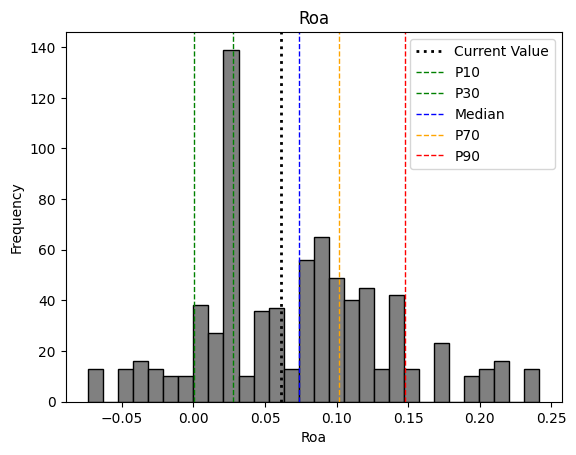

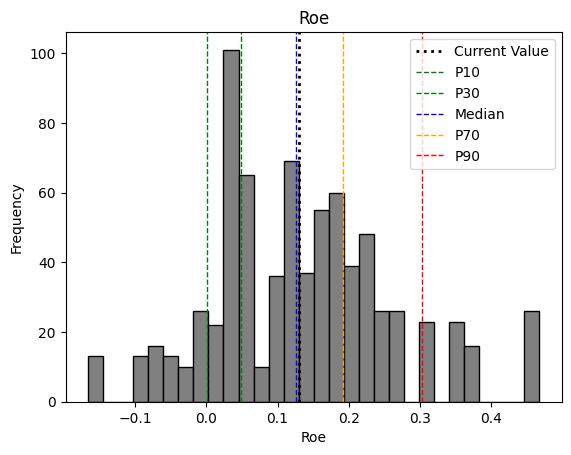

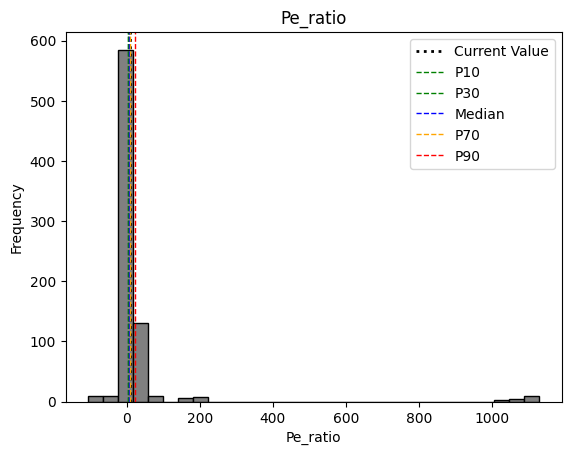

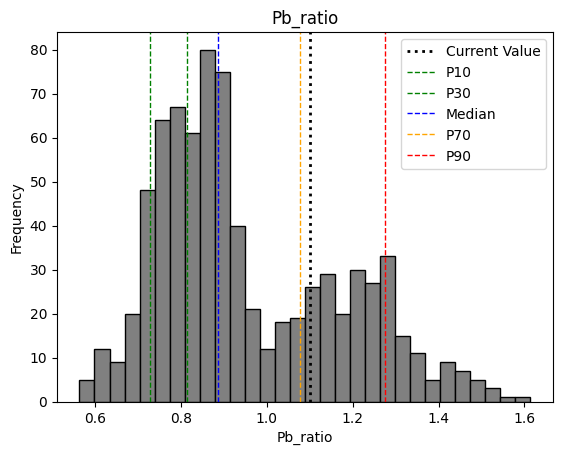

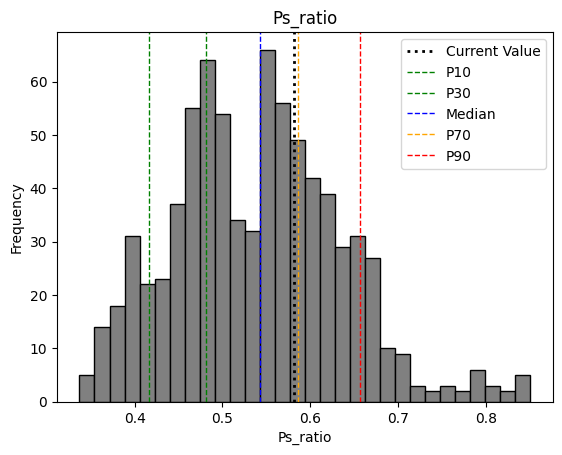

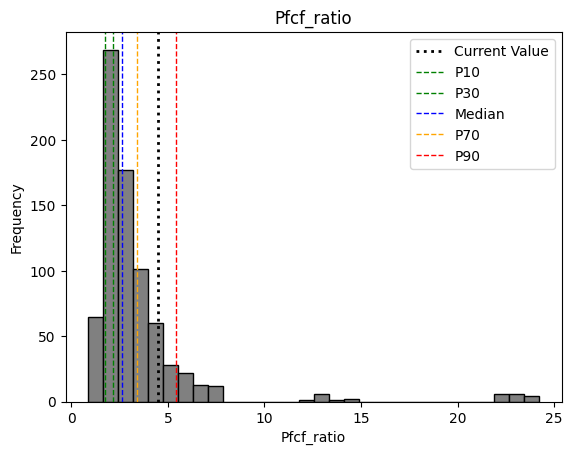

In [63]:
for column in merged_nat_curr.columns[-8:]:
    try:
        plt.hist(merged_nat_curr[column].values, bins=30, edgecolor='black', color='gray')
        plt.axvline(merged_nat_curr[column].iloc[-1], color='k', linestyle='dotted', linewidth=2, label='Current Value')
        plt.axvline(merged_nat_curr[column].quantile(0.1), color='green', linestyle='dashed', linewidth=1, label='P10')
        plt.axvline(merged_nat_curr[column].quantile(0.3), color='green', linestyle='dashed', linewidth=1, label='P30')
        plt.axvline(merged_nat_curr[column].quantile(0.5), color='blue', linestyle='dashed', linewidth=1, label='Median')
        plt.axvline(merged_nat_curr[column].quantile(0.7), color='orange', linestyle='dashed', linewidth=1, label='P70')
        plt.axvline(merged_nat_curr[column].quantile(0.9), color='red', linestyle='dashed', linewidth=1, label='P90')
        
        plt.xlabel(column.capitalize())
        plt.ylabel('Frequency')
        plt.title(column.capitalize())
        
        plt.legend()

        plt.show()
    except:
        print(column + " diagram is missing due to error.")

## Calculate correlation between value parameters

In [64]:
corr_matrix = pd.DataFrame(merged_nat_curr, columns=['real_date', 'gross_profit_margin', 'net_profit_margin', 'roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'pfcf_ratio'])
# find independent columns
corr_matrix.corr()

,real_date,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
real_date,1.000000,0.241876,-0.447488,-0.429604,-0.363264,0.246483,0.291527,0.263037,0.245232
gross_profit_margin,0.241876,1.000000,0.380444,0.361635,0.345134,-0.154131,-0.143184,0.071733,0.000592
net_profit_margin,-0.447488,0.380444,1.000000,0.972616,0.948281,-0.182148,-0.079286,-0.315193,-0.227131
roa,-0.429604,0.361635,0.972616,1.000000,0.984448,-0.173937,0.002675,-0.398237,-0.191368
roe,-0.363264,0.345134,0.948281,0.984448,1.000000,-0.165175,0.076319,-0.399330,-0.190341
pe_ratio,0.246483,-0.154131,-0.182148,-0.173937,-0.165175,1.000000,0.167089,0.096277,-0.125275
pb_ratio,0.291527,-0.143184,-0.079286,0.002675,0.076319,0.167089,1.000000,0.290754,0.504154
ps_ratio,0.263037,0.071733,-0.315193,-0.398237,-0.399330,0.096277,0.290754,1.000000,0.091125
pfcf_ratio,0.245232,0.000592,-0.227131,-0.191368,-0.190341,-0.125275,0.504154,0.091125,1.000000


In [66]:
tolerance = 0.2

In [67]:
gpm = merged_nat_curr[(merged_nat_curr['gross_profit_margin']<= merged_nat_curr['gross_profit_margin'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['gross_profit_margin']>= merged_nat_curr['gross_profit_margin'].iloc[-1] * (1- tolerance))]['date'].values
roe = merged_nat_curr[(merged_nat_curr['roe']<= merged_nat_curr['roe'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['roe']>= merged_nat_curr['roe'].iloc[-1] * (1- tolerance))]['date'].values
per = merged_nat_curr[(merged_nat_curr['pe_ratio']<= merged_nat_curr['pe_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pe_ratio']>= merged_nat_curr['pe_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pbr = merged_nat_curr[(merged_nat_curr['pb_ratio']<= merged_nat_curr['pb_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pb_ratio']>= merged_nat_curr['pb_ratio'].iloc[-1] * (1- tolerance))]['date'].values
psr = merged_nat_curr[(merged_nat_curr['ps_ratio']<= merged_nat_curr['ps_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['ps_ratio']>= merged_nat_curr['ps_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pfcfr = merged_nat_curr[(merged_nat_curr['pfcf_ratio']<= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pfcf_ratio']>= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1- tolerance))]['date'].values

In [70]:
test3 =  utils.list_intersect(gpm, roe)
#test4 =  utils.list_intersect(test3, per)
test5 =  utils.list_intersect(test3, pbr)
test6 =  utils.list_intersect(test5, psr)
test7 =  utils.list_intersect(test6, pfcfr)
print(len(test7), 'timestemos have been found!')

11 timestemos have been found!


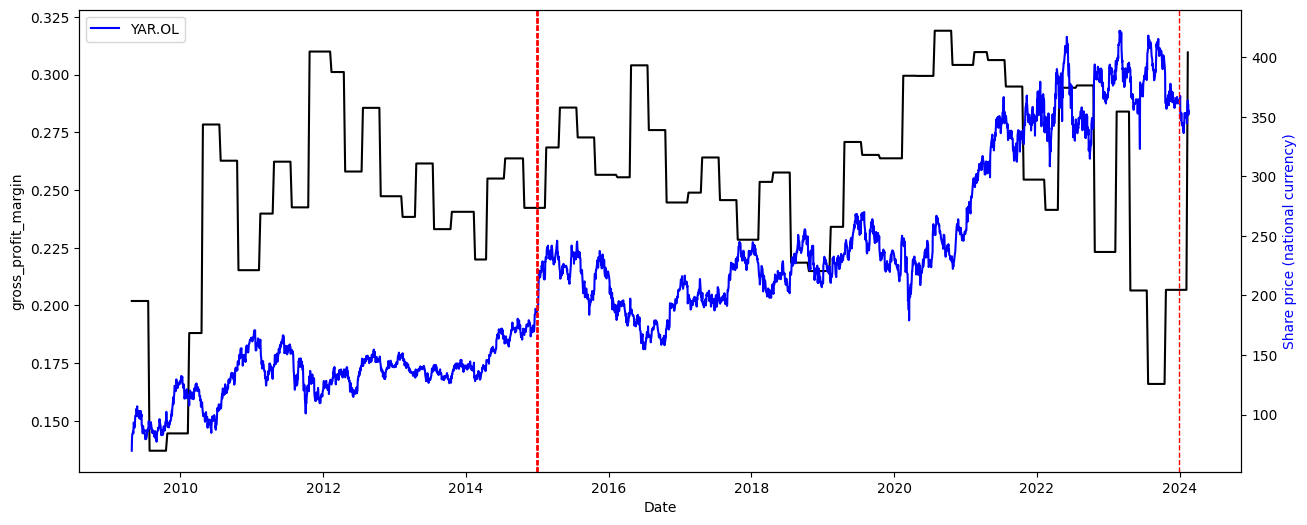

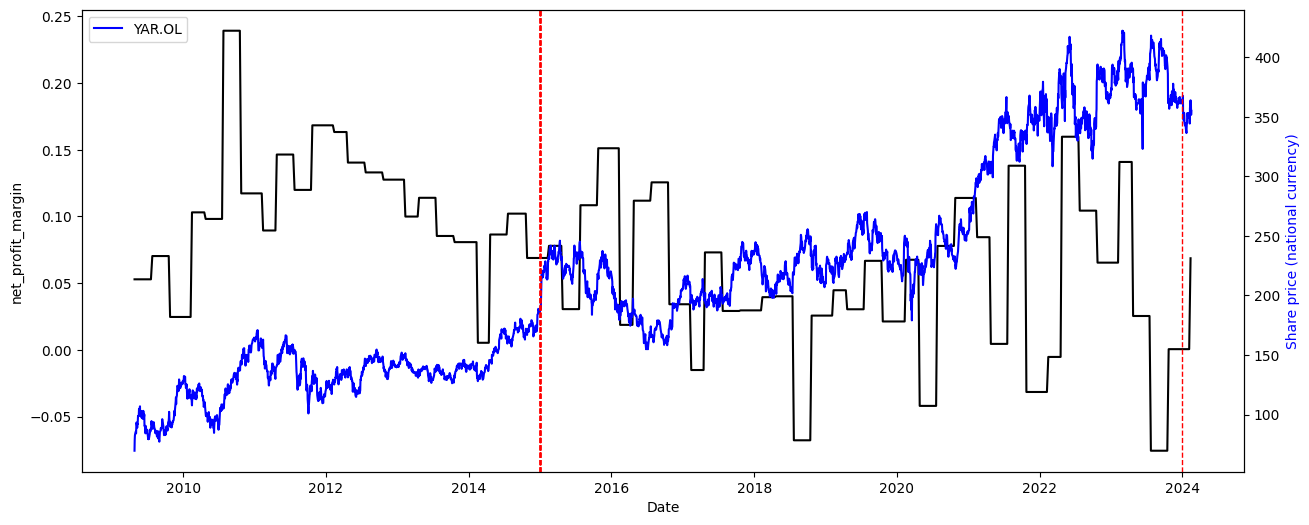

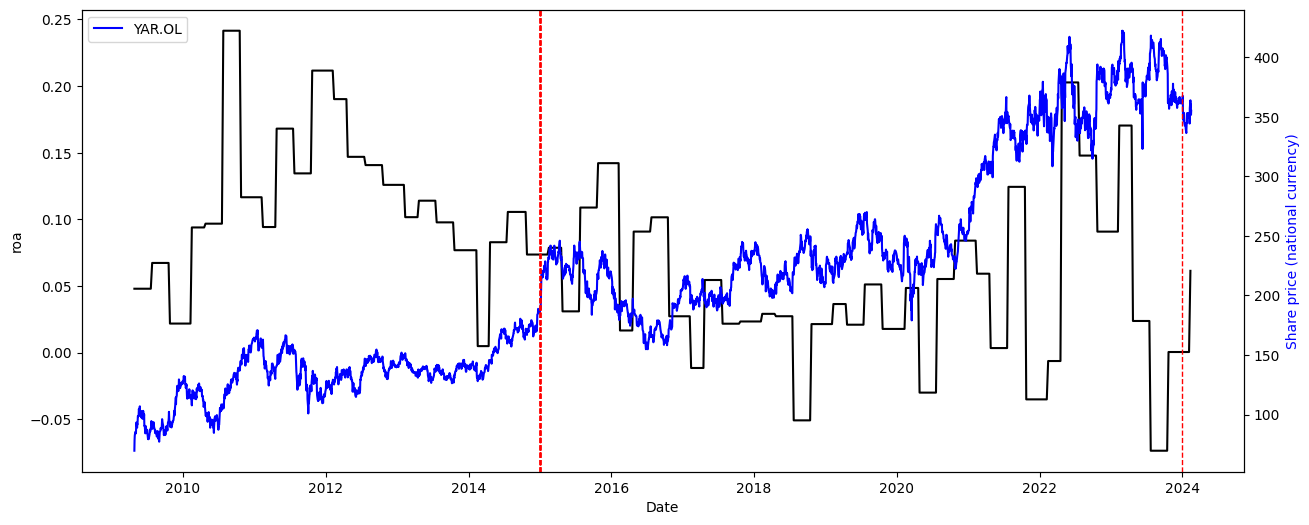

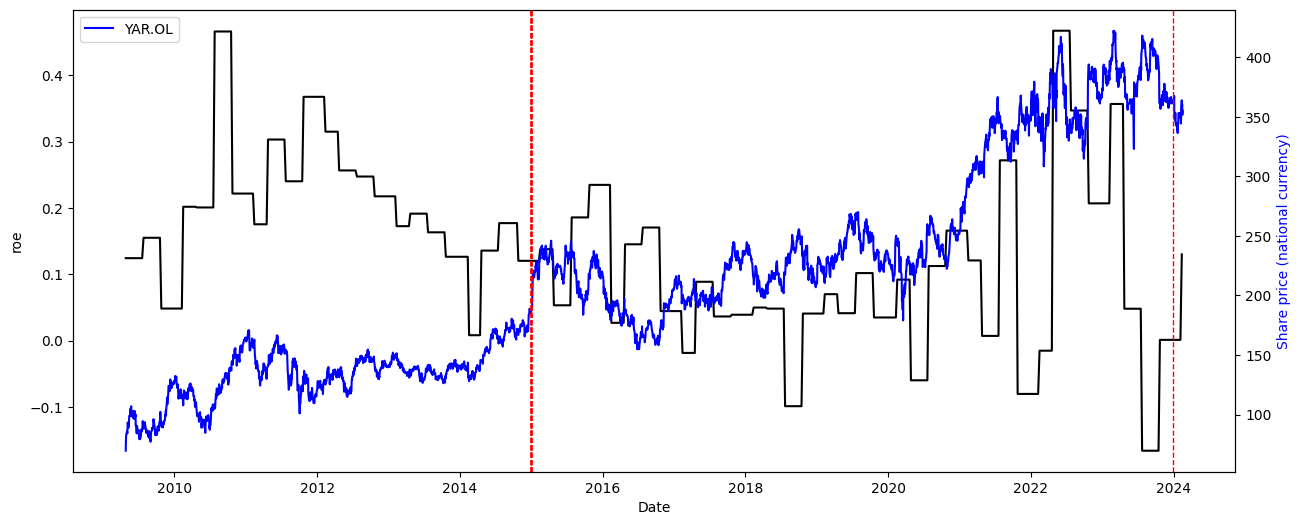

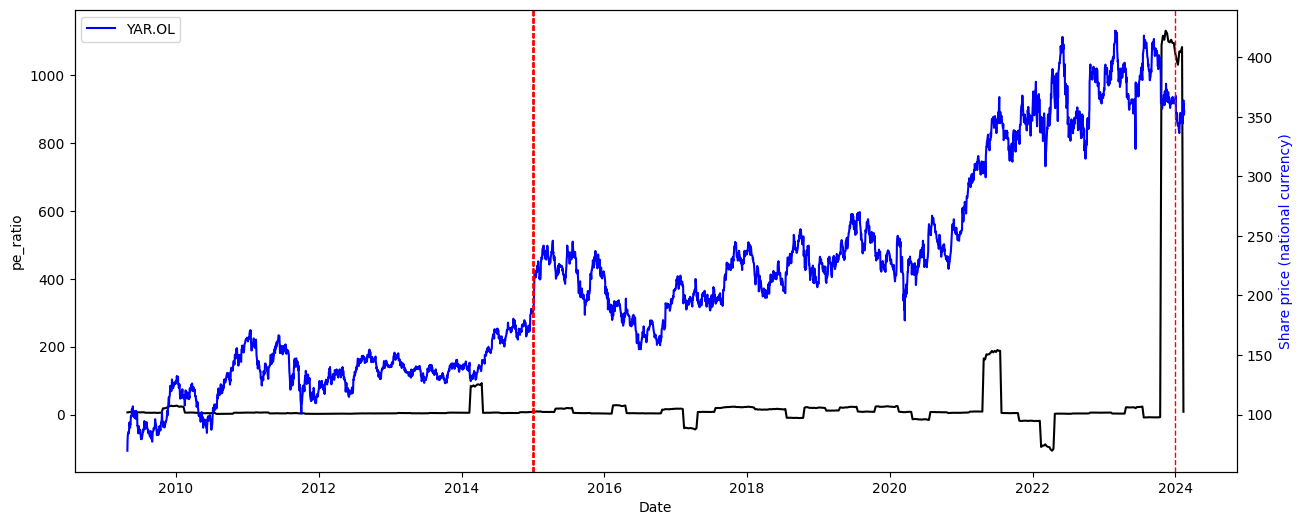

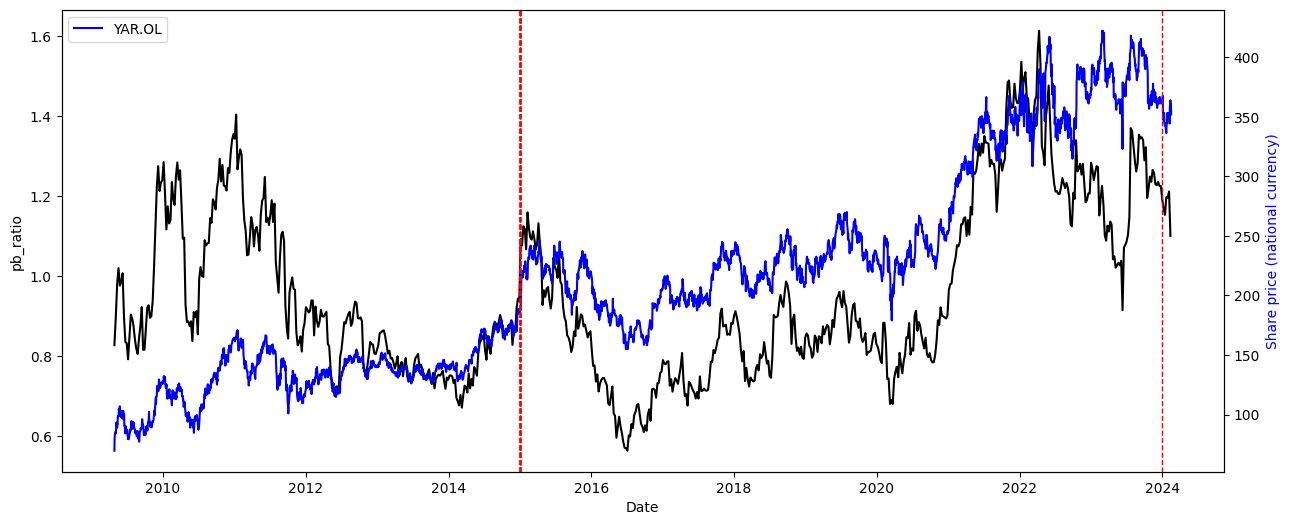

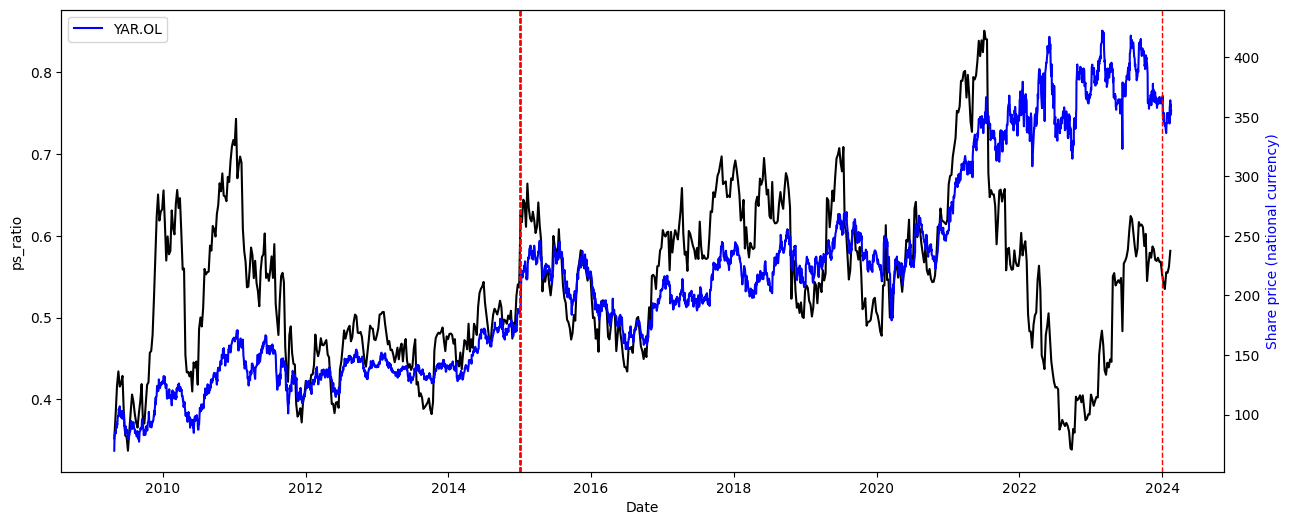

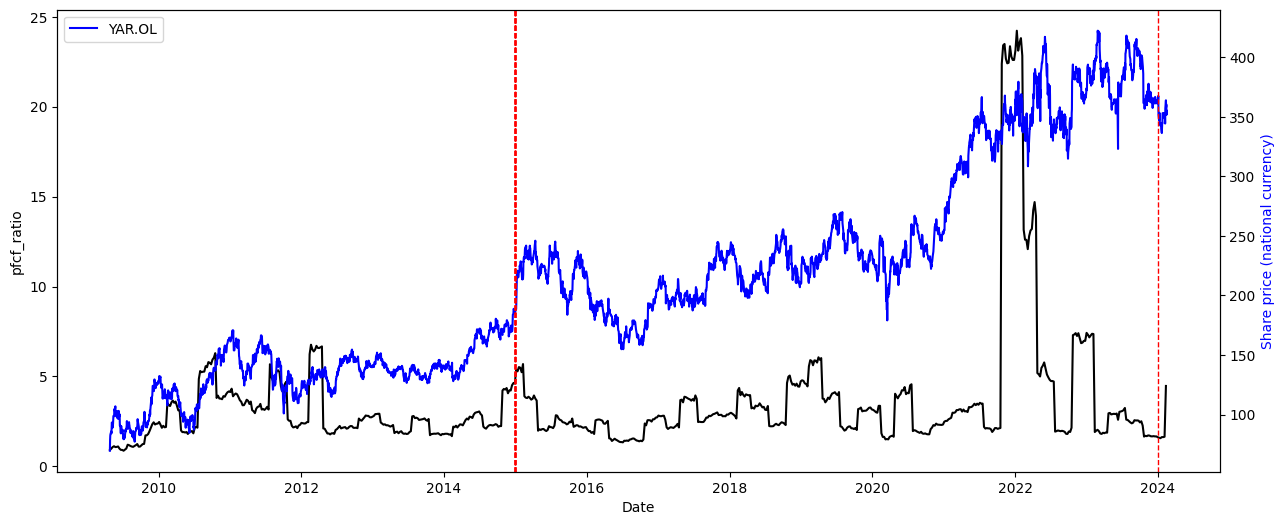

In [71]:
for column in merged_nat_curr.columns[-8:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=column)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    for timestamp in test7:
        plt.axvline(timestamp, color='red', linestyle='dashed', linewidth=1)

    plt.legend()
    plt.show()